- SW: Swimming Birds
- W: Wading Birds
- T: Terrestrial Birds
- R: Raptors
- P: Scansorial Birds
- SO: Singing Birds

In [53]:
import pandas as pd
df = pd.read_csv('bird.csv')
df.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [2]:
classes = ['SW','W','T','R','P','SO']
df.shape

(420, 12)

In [3]:
df.dropna(inplace=True)

In [4]:
df.isnull().sum()

id       0
huml     0
humw     0
ulnal    0
ulnaw    0
feml     0
femw     0
tibl     0
tibw     0
tarl     0
tarw     0
type     0
dtype: int64

In [5]:
df.shape

(413, 12)

In [30]:
x = df.drop(['id','type'],axis=1)
y = df['type']
df.groupby(y).size()

type
P      38
R      48
SO    124
SW    116
T      23
W      64
dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [39]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
tree_clf.predict([[17.89,1.44,19.26,1.10,17.62,1.34,29.81,1.24,21.69,1.05]])

array([2], dtype=int64)

In [41]:
tree_clf.predict_proba([[17.89,1.44,19.26,1.10,17.62,1.34,29.81,1.24,21.69,1.05]])

array([[0., 0., 1., 0., 0., 0.]])

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)
x_train.shape,x_test.shape

((330, 10), (83, 10))

In [47]:
y_pred = tree_clf.predict(x_test)

In [48]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

1.0

In [52]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         9

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83

[[ 8  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 33  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0  9]]


In [50]:
from sklearn.tree import export_graphviz
# from IPython.display import image
export_graphviz(tree_clf,out_file = 'birds_tree.dot',feature_names = df.columns[1:-1],class_names=classes,
               rounded=True,filled=True)

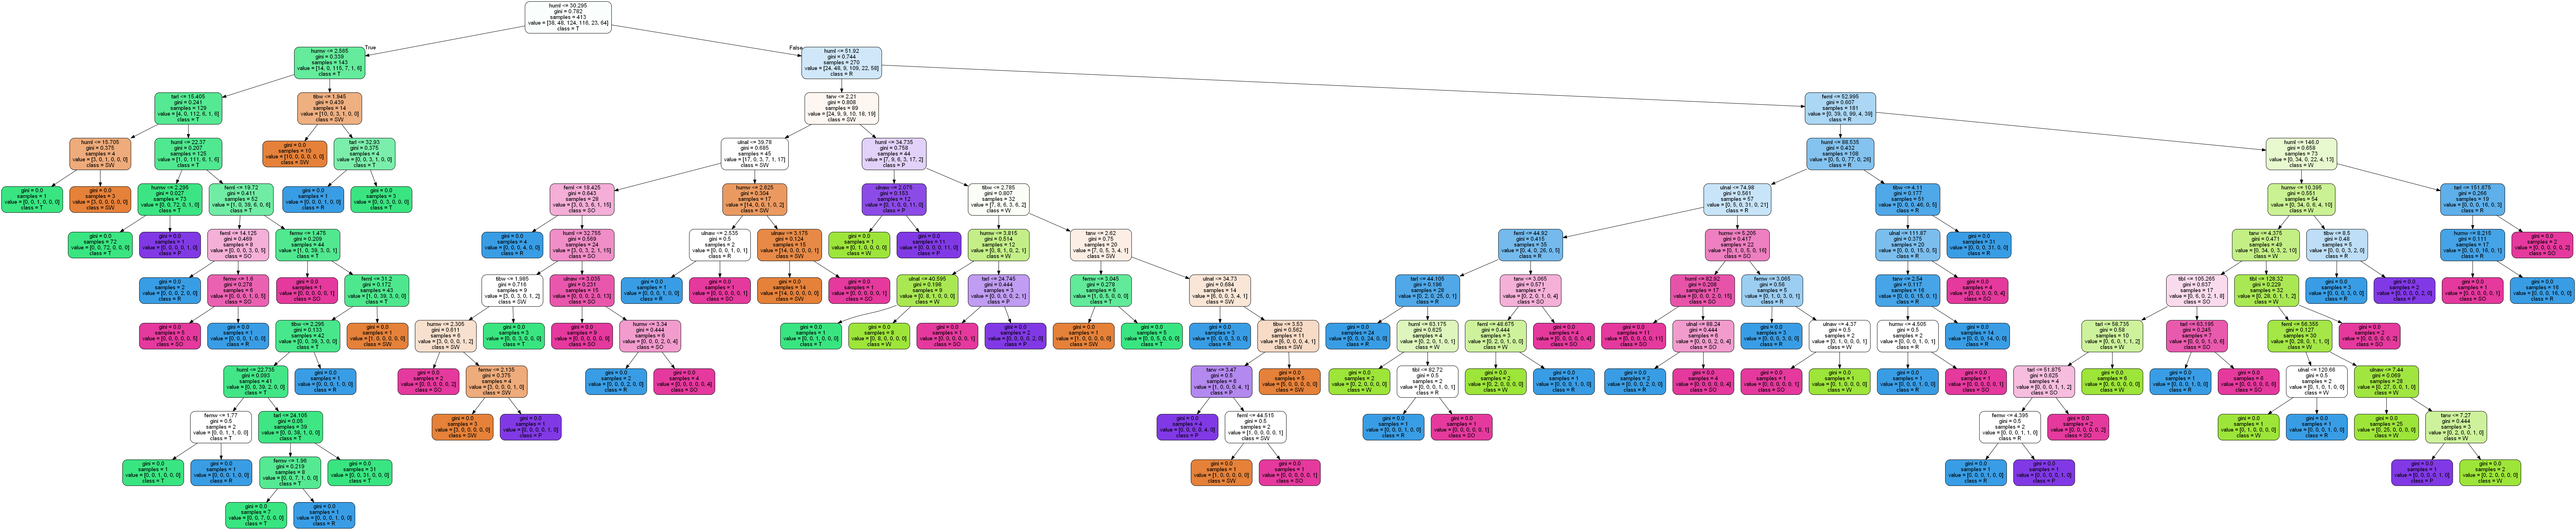

In [51]:
import os
os.environ['PATH']+=os.environ['PATH']+';'+r'C:\ProgramData\Anaconda3\Library\bin\graphviz\release\bin'
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(tree_clf,out_file=dot_data,filled=True,rounded=True,feature_names = df.columns[1:-1],class_names=classes)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())